In [8]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 91 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638445 sha256=239b7f44a2a33babbccca3945befd891eaf0e427338cbb12302b186275ac47a2
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [36]:
# from google.colab import drive
# drive.mount('/content/drive')

In [37]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [38]:
data = pd.read_csv("Gasoline.csv")
data

,Tanggal,qty,Jumlah
0,2016-01-01,8694,63467076.0
1,2016-01-02,10044,73320032.0
2,2016-01-03,13928,101671188.0
3,2016-01-04,12518,91382972.0
4,2016-01-05,11112,77424375.0
...,...,...,...
1993,2021-10-25,12239,93628350.0
1994,2021-10-26,11319,86590350.0
1995,2021-10-27,12502,95640300.0
1996,2021-10-28,12456,95288400.0


In [39]:
data.isnull().sum()

Tanggal    0
qty        0
Jumlah     0
dtype: int64

<Axes: >

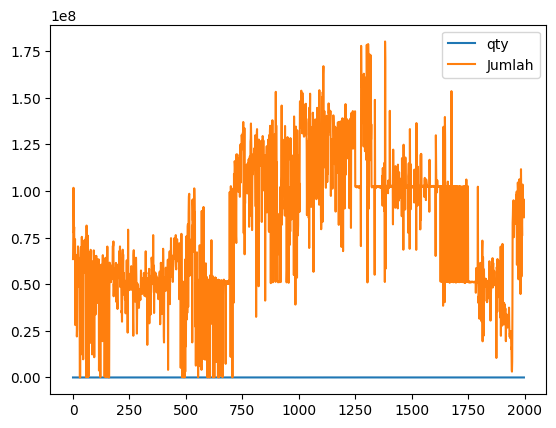

In [40]:
data.plot()

<Axes: >

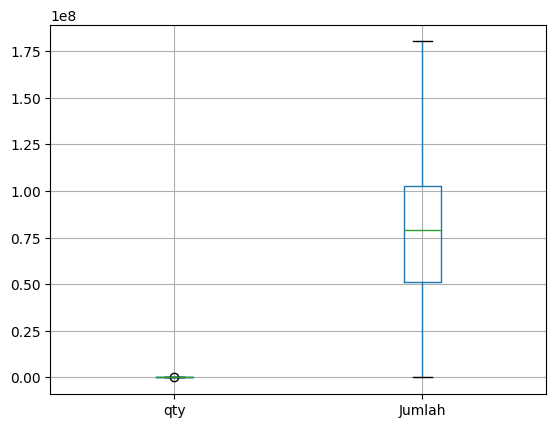

In [41]:
data.boxplot()

In [42]:
data.columns = ['Tanggal', 'qty', 'Jumlah']
data = data.rename(columns = {"Tanggal":"ds","Jumlah":"y"})
del data['qty']
data.head()

,ds,y
0,2016-01-01,63467076.0
1,2016-01-02,73320032.0
2,2016-01-03,101671188.0
3,2016-01-04,91382972.0
4,2016-01-05,77424375.0


In [43]:
data = data.fillna(data.mode())
data.isnull().sum()

ds    0
y     0
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1998 non-null   object 
 1   y       1998 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.3+ KB


In [45]:
data['ds'] = pd.to_datetime(data['ds'])

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1998 non-null   datetime64[ns]
 1   y       1998 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.3 KB


In [47]:
data.head()

,ds,y
0,2016-01-01,63467076.0
1,2016-01-02,73320032.0
2,2016-01-03,101671188.0
3,2016-01-04,91382972.0
4,2016-01-05,77424375.0


In [48]:
from prophet import Prophet

In [49]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot

In [50]:
model = Prophet()

In [51]:
model.fit(data)

14:42:18 - cmdstanpy - INFO - Chain [1] start processing
14:42:19 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [53]:
future_dates = model.make_future_dataframe(periods = 365)

In [54]:
future_dates.tail()

,ds
2358,2022-10-25
2359,2022-10-26
2360,2022-10-27
2361,2022-10-28
2362,2022-10-29


In [55]:
future_dates.head()

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05


In [56]:
prediction = model.predict(future_dates)

In [57]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,4.945047e+07,1.462608e+07,7.125216e+07,4.945047e+07,4.945047e+07,-6.075287e+06,-6.075287e+06,-6.075287e+06,-3.180647e+05,-3.180647e+05,-3.180647e+05,-5.757222e+06,-5.757222e+06,-5.757222e+06,0.0,0.0,0.0,4.337518e+07
1,2016-01-02,4.945453e+07,2.156358e+07,7.500214e+07,4.945453e+07,4.945453e+07,-1.559672e+06,-1.559672e+06,-1.559672e+06,3.784359e+06,3.784359e+06,3.784359e+06,-5.344030e+06,-5.344030e+06,-5.344030e+06,0.0,0.0,0.0,4.789486e+07
2,2016-01-03,4.945860e+07,1.723889e+07,7.462014e+07,4.945860e+07,4.945860e+07,-3.576398e+06,-3.576398e+06,-3.576398e+06,1.343984e+06,1.343984e+06,1.343984e+06,-4.920382e+06,-4.920382e+06,-4.920382e+06,0.0,0.0,0.0,4.588220e+07
3,2016-01-04,4.946267e+07,1.914496e+07,7.452303e+07,4.946267e+07,4.946267e+07,-4.412114e+06,-4.412114e+06,-4.412114e+06,7.944194e+04,7.944194e+04,7.944194e+04,-4.491556e+06,-4.491556e+06,-4.491556e+06,0.0,0.0,0.0,4.505056e+07
4,2016-01-05,4.946674e+07,1.488224e+07,7.240328e+07,4.946674e+07,4.946674e+07,-5.901093e+06,-5.901093e+06,-5.901093e+06,-1.838195e+06,-1.838195e+06,-1.838195e+06,-4.062898e+06,-4.062898e+06,-4.062898e+06,0.0,0.0,0.0,4.356565e+07


In [58]:
# prediction['ds'] = prediction['ds'].apply(pd.Timestamp.timestamp)
# prediction = np.array(prediction, dtype=float)

/home/rspn/miniconda3/envs/ml/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/rspn/miniconda3/envs/ml/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


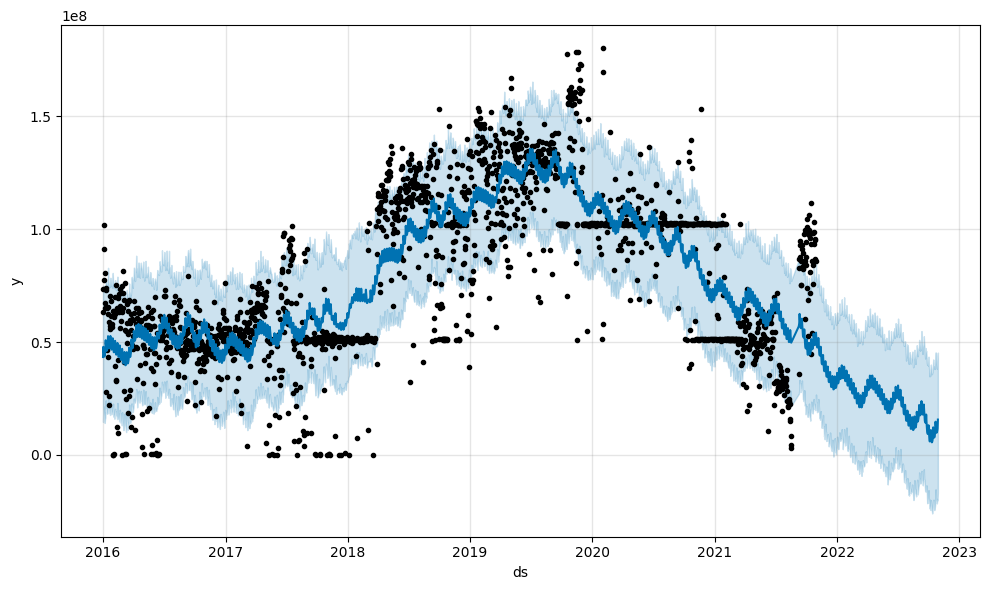

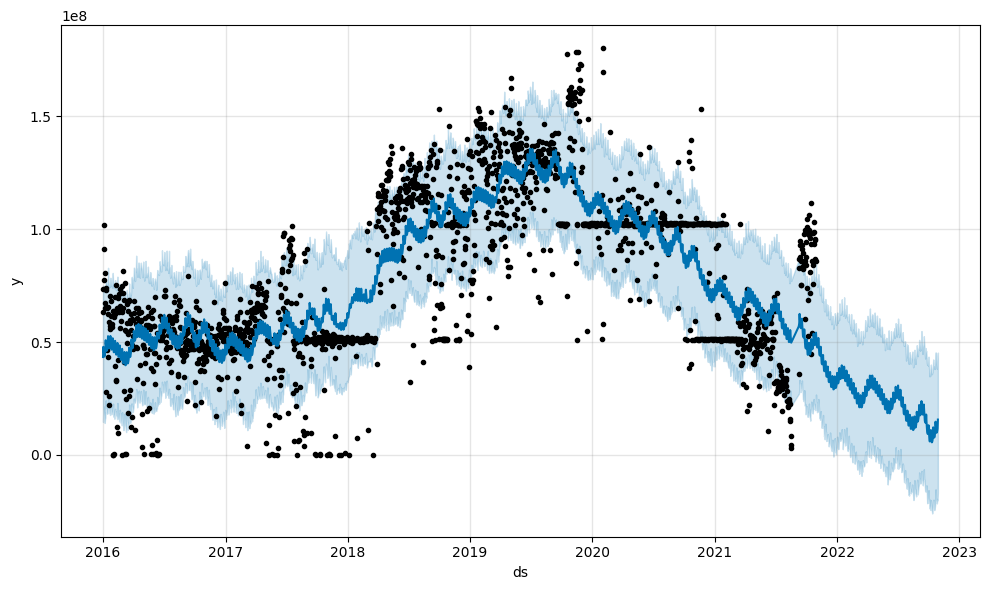

In [59]:
model.plot(prediction)

/home/rspn/miniconda3/envs/ml/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/rspn/miniconda3/envs/ml/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/rspn/miniconda3/envs/ml/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

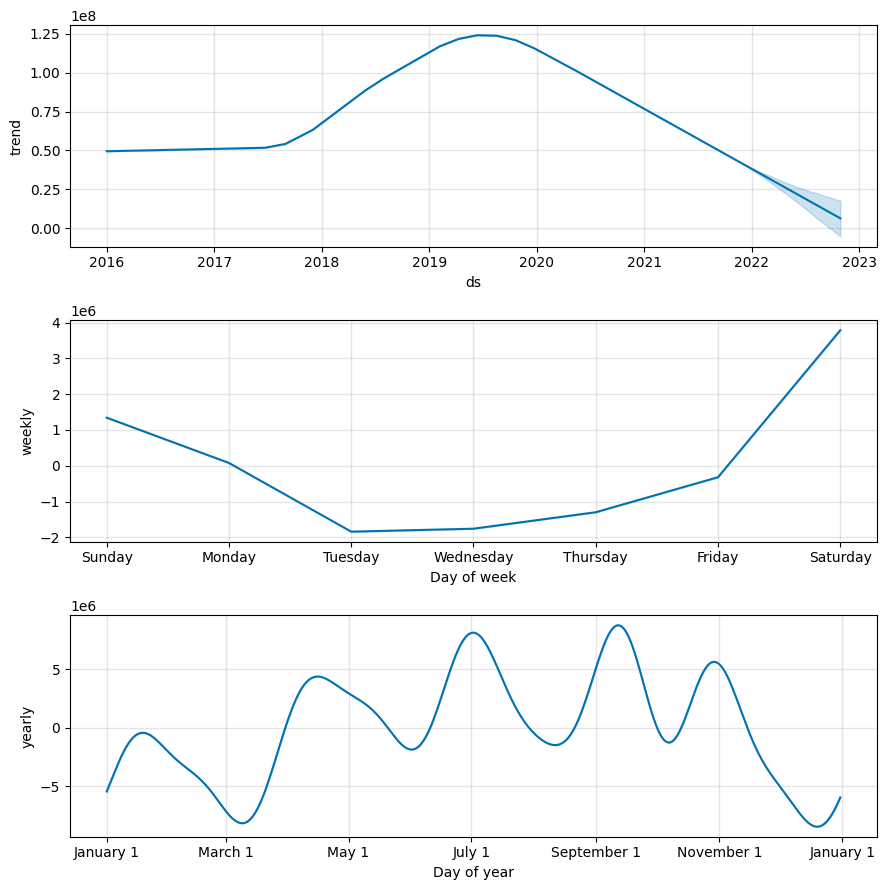

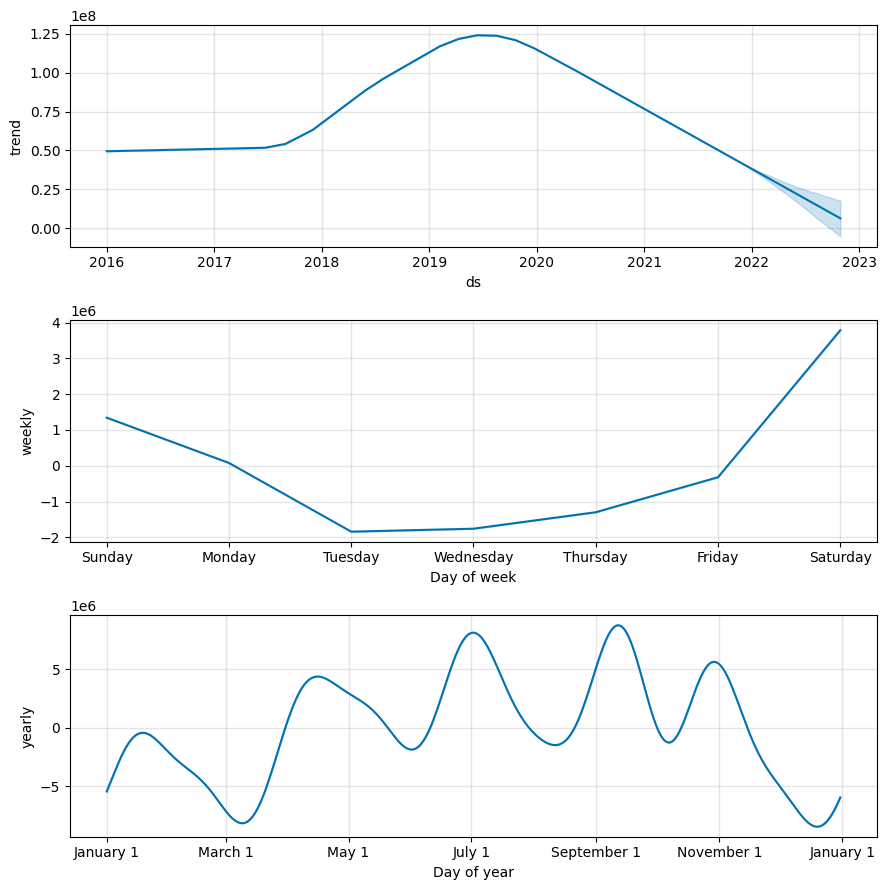

In [60]:
model.plot_components(prediction)

In [61]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = "730 days", period = "180days", horizon= "365 days")
df_cv.head()

  0%|                                                                                                                                                   | 0/6 [00:00<?, ?it/s]14:42:33 - cmdstanpy - INFO - Chain [1] start processing
14:42:33 - cmdstanpy - INFO - Chain [1] done processing
 17%|███████████████████████▏                                                                                                                   | 1/6 [00:00<00:01,  4.83it/s]14:42:34 - cmdstanpy - INFO - Chain [1] start processing
14:42:34 - cmdstanpy - INFO - Chain [1] done processing
 33%|██████████████████████████████████████████████▎                                                                                            | 2/6 [00:00<00:00,  4.82it/s]14:42:34 - cmdstanpy - INFO - Chain [1] start processing
14:42:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████████████████████████████████████████████████████████████████████▌                                                                

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-05-14,8.178345e+07,5.794546e+07,1.048306e+08,133676250.0,2018-05-13
1,2018-05-15,8.260889e+07,5.772888e+07,1.061086e+08,66022200.0,2018-05-13
2,2018-05-16,8.117230e+07,5.616936e+07,1.058531e+08,98349600.0,2018-05-13
3,2018-05-17,7.836875e+07,5.655575e+07,1.011400e+08,93312150.0,2018-05-13
4,2018-05-18,7.853203e+07,5.555036e+07,1.024387e+08,99272600.0,2018-05-13


In [62]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,7.229449e+14,2.688763e+07,2.134623e+07,0.233807,0.155804,0.215063,0.675926
1,37 days,7.155829e+14,2.675038e+07,2.132942e+07,0.234062,0.158228,0.214927,0.680556
2,38 days,7.240386e+14,2.690797e+07,2.155252e+07,0.237437,0.162181,0.217620,0.675926
3,39 days,7.129026e+14,2.670024e+07,2.134884e+07,0.233561,0.160753,0.215043,0.680556
4,40 days,7.120991e+14,2.668518e+07,2.127009e+07,0.233187,0.162181,0.214400,0.675926


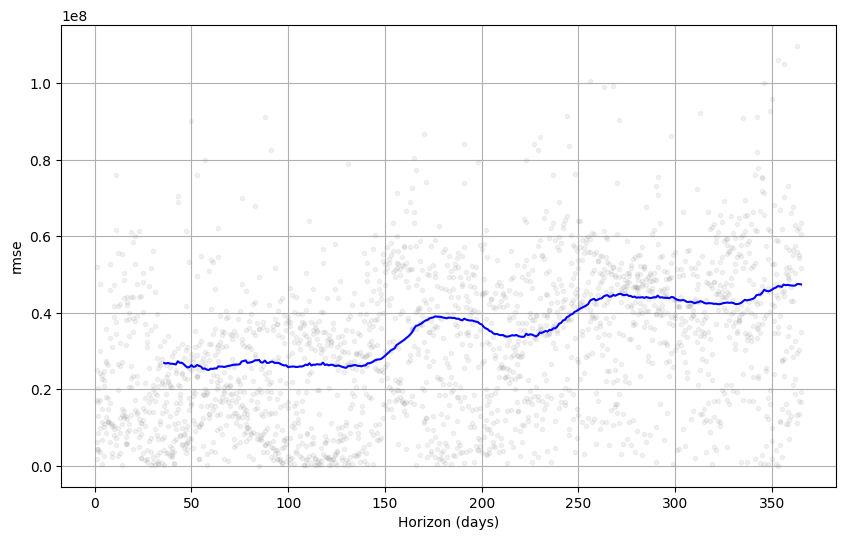

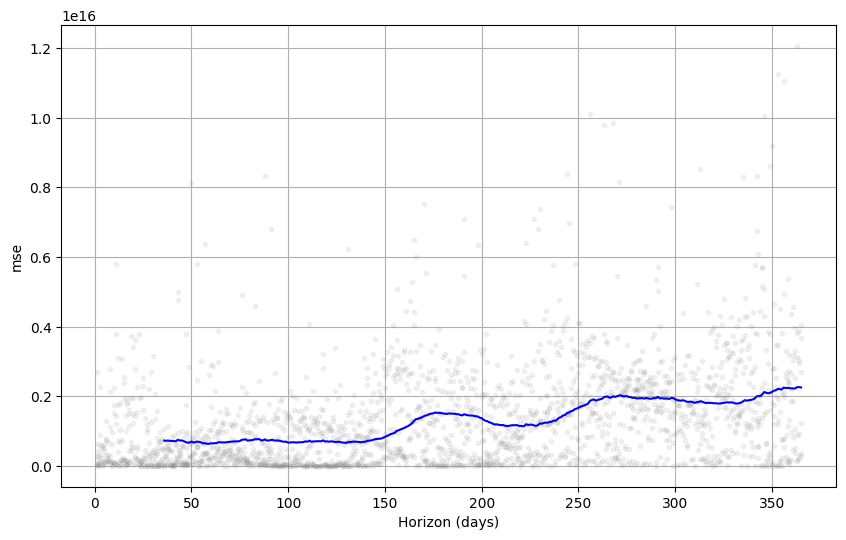

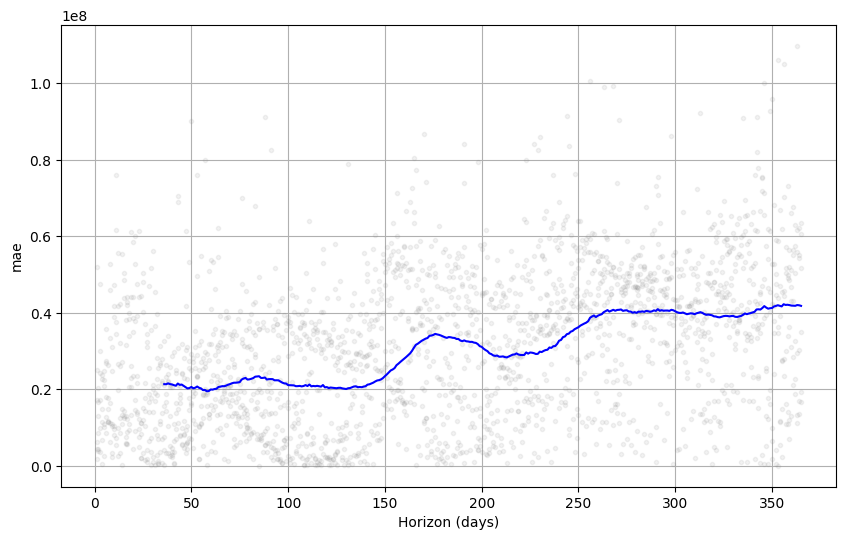

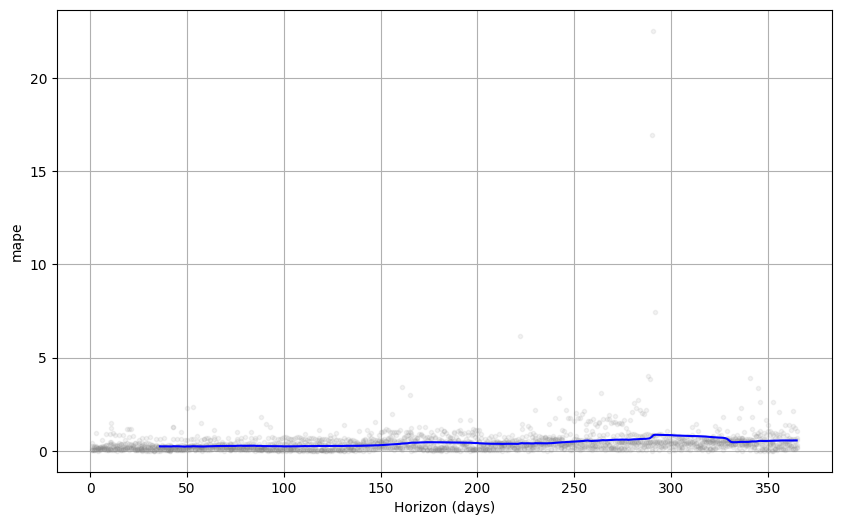

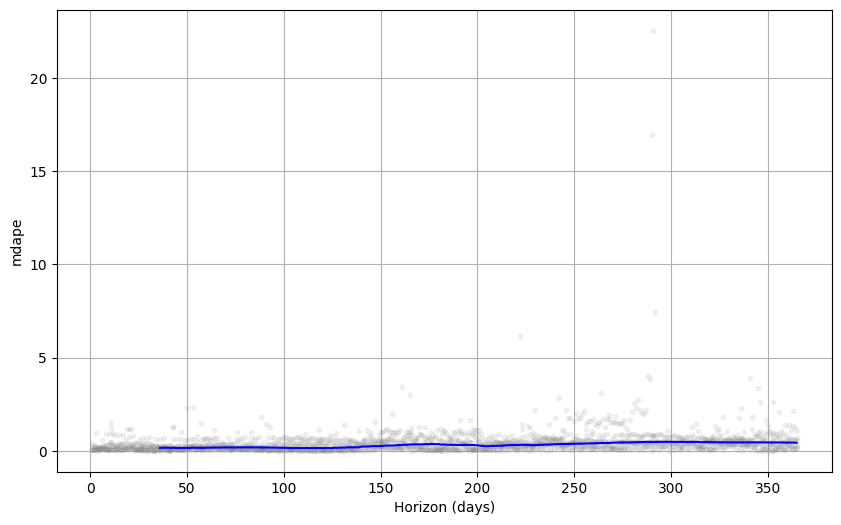

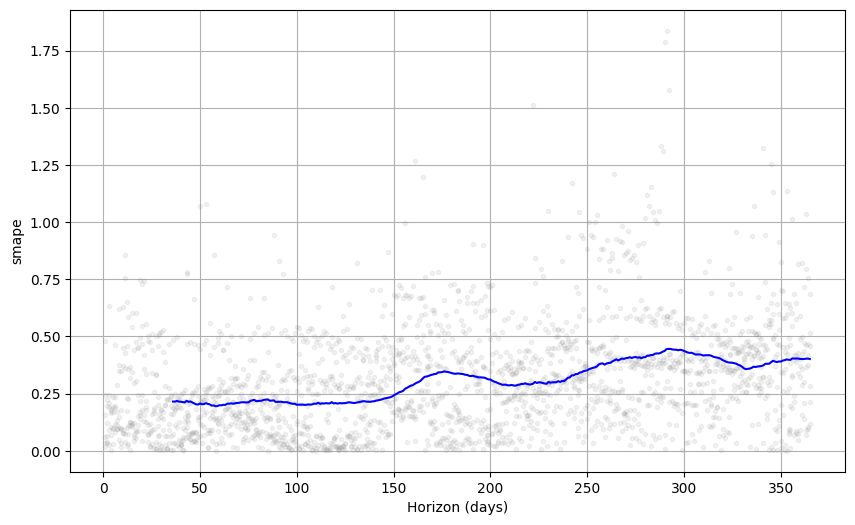

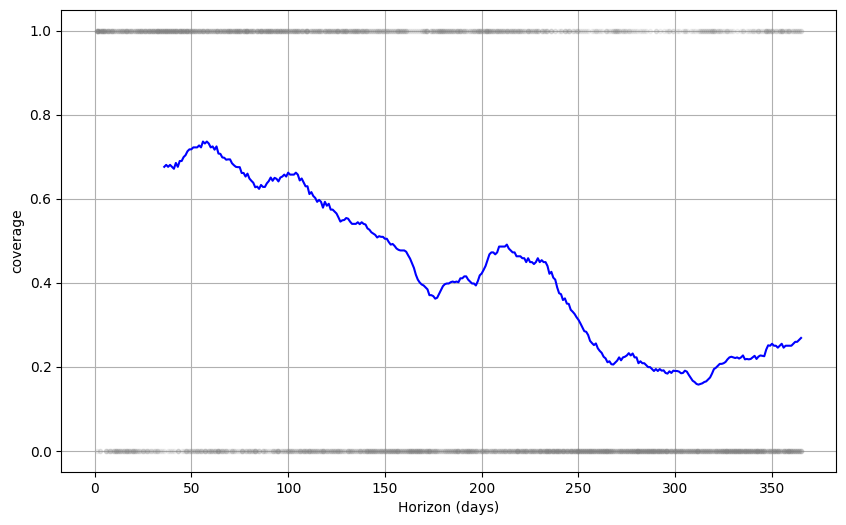

In [63]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric (df_cv, metric = 'rmse')
fig = plot_cross_validation_metric (df_cv, metric = 'mse')
fig = plot_cross_validation_metric (df_cv, metric = 'mae')
fig = plot_cross_validation_metric (df_cv, metric = 'mape')
fig = plot_cross_validation_metric (df_cv, metric = 'mdape')
fig = plot_cross_validation_metric (df_cv, metric = 'smape')
fig = plot_cross_validation_metric (df_cv, metric = 'coverage')